In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [48]:
data = pd.read_csv('train_data.csv')

In [49]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [50]:
# Data Preporcessing 

In [51]:
# Check for missing values

In [52]:
data.isnull()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
# the is null function which will give us a matrix or data frame of true false values, where a value will be true 
# if that particular value is null.

In [54]:
data.isnull().sum()
# Sum across the columns or across the rows,So we get total number of null values in each columns. 

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [55]:
# There's only two columns Bed Grade and City_Code_Patient that have any null values,So now we need to figure out what is
# the data type of those two columns.

In [56]:
# Now we will fill the null value with the means of those respective columns (Bed Grade and City_Code_Patient)
# So to do that we will write a function below.

In [57]:
def impute_missing_values(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].mean())

In [58]:
# On above we call function impute_missing_values, here we will take some data and some list of columns, for each column we are
# going to set that column in the data.
# Same column with the null values,function will fill the null values with the "mean" of that column.

In [59]:
# Example:In bed grade, where column is bed grade this will take the column of the data fill it with the mean of that column
# and store it back in the original column.

In [60]:
impute_columns = ['Bed Grade', 'City_Code_Patient'] # create a list impute columns. 
impute_missing_values(data, impute_columns)
# run impute  missing values on those columns,so we pass the data we have and impute columns.   

In [61]:
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [62]:
# So there is no more  missing values.

In [63]:
# Encoding

In [64]:
data.dtypes
# gives us the list of all the data types.

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [65]:
def get_categorical_uniques(data): # make a functions that going to get all the unique values of each of the object columns
    categorical_columns = [column for column in data.dtypes.index if data.dtypes[column] == 'object'] 
    # gives us the list of all of the columns name with object data or string data.
    
    categorical_uniques = {column: data[column].unique() for column in categorical_columns} 
    # we make a dictionary that matches the column name to its respective unique values
    
    return categorical_uniques

In [66]:
# on the above ".index" to get all those column names,

In [67]:
get_categorical_uniques(data) # matches the column name to the list of unique values in that column.

{'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object),
 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
 'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [68]:
pd.get_dummies(data['Department']) 

# This will take each unique value and create a new column for it and return for each example all zeros with a single one
# depending on what the original value was.


,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
318433,0,0,0,1,0
318434,0,1,0,0,0
318435,0,0,1,0,0
318436,0,1,0,0,0


In [69]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [70]:
onehot_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code']

In [71]:
data = onehot_encode(data, onehot_columns)

In [72]:
data

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
0,1,8,3,3,2.0,31397,7.0,Emergency,Extreme,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,Emergency,Moderate,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,Urgent,Moderate,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,Emergency,Minor,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,Trauma,Minor,5,...,0,0,0,0,0,0,0,1,0,0


In [73]:
categorical_uniques = get_categorical_uniques(data)
get_categorical_uniques(data)

{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [74]:
for column in categorical_uniques:
    categorical_uniques[column] = sorted(categorical_uniques[column])

In [75]:
categorical_uniques

{'Type of Admission': ['Emergency', 'Trauma', 'Urgent'],
 'Severity of Illness': ['Extreme', 'Minor', 'Moderate'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [76]:
unique_list = categorical_uniques['Type of Admission']
unique_list.insert(0, unique_list.pop(unique_list.index('Urgent')))
unique_list.insert(0, unique_list.pop(unique_list.index('Trauma')))

unique_list = categorical_uniques['Severity of Illness']
unique_list.insert(0, unique_list.pop(unique_list.index('Moderate')))
unique_list.insert(0, unique_list.pop(unique_list.index('Minor')))

In [77]:
categorical_uniques

{'Type of Admission': ['Trauma', 'Urgent', 'Emergency'],
 'Severity of Illness': ['Minor', 'Moderate', 'Extreme'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [78]:
stay_mappings = {value: index for index, value in enumerate(categorical_uniques['Stay'])}
stay_mappings

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

In [79]:
def ordinal_encode(data, uniques):
    for column in uniques:
        data[column] = data[column].apply(lambda x: uniques[column].index(x))


In [80]:
data['Stay']

0          0-10
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433    11-20
318434    31-40
318435    11-20
318436    11-20
318437     0-10
Name: Stay, Length: 318438, dtype: object

In [81]:
ordinal_encode(data, categorical_uniques)
data['Stay']


0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [82]:
(data.dtypes == 'object').sum()

0

In [83]:
data

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
0,1,8,3,3,2.0,31397,7.0,2,2,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,0,2,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,2,1,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,1,1,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,2,0,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,0,0,5,...,0,0,0,0,0,0,0,1,0,0


In [84]:
data.set_index('case_id', inplace=True)

In [85]:
y = data['Stay']
X = data.drop('Stay', axis=1)

In [101]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [102]:
X

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,R,S,T,U,A,B,C,D,E,F
case_id,,,,,,,,,,,,,,,,,,,,,
1,-1.195176,-0.571055,-0.169177,-0.716855,-0.904442,-0.053458,1.212557,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
2,-1.890124,0.073580,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
3,-0.963527,-1.215691,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394
4,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
5,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,-1.426825,0.395897,-0.169177,1.574123,0.546379,3.342582,1.212557,0.138090,-0.161049,-0.067622,...,-0.819554,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
318435,0.658018,-1.215691,-1.025217,1.574123,-1.722559,0.158795,0.118792,0.138090,0.405826,2.049268,...,-0.819554,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394
318436,-1.311001,-0.248738,-0.169177,1.574123,1.566288,0.583300,1.212557,-1.370469,-0.161049,1.520045,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633


In [91]:
#Training

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [104]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [106]:
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [107]:
batch_size = 32
epochs = 10

history = nn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/10
6369/6369 [==============================] - 7s 1ms/step - loss: 1.6410 - accuracy: 0.3795 - val_loss: 1.5807 - val_accuracy: 0.3981
Epoch 2/10
6369/6369 [==============================] - 6s 935us/step - loss: 1.5694 - accuracy: 0.4005 - val_loss: 1.5629 - val_accuracy: 0.4035
Epoch 3/10
6369/6369 [==============================] - 7s 1ms/step - loss: 1.5579 - accuracy: 0.4043 - val_loss: 1.5554 - val_accuracy: 0.4061
Epoch 4/10
6369/6369 [==============================] - 7s 1ms/step - loss: 1.5521 - accuracy: 0.4065 - val_loss: 1.5508 - val_accuracy: 0.4080
Epoch 5/10
6369/6369 [==============================] - 7s 1ms/step - loss: 1.5471 - accuracy: 0.4092 - val_loss: 1.5454 - val_accuracy: 0.4098
Epoch 6/10
6369/6369 [==============================] - 7s 1ms/step - loss: 1.5424 - accuracy: 0.4107 - val_loss: 1.5404 - val_accuracy: 0.4127
Epoch 7/10
6369/6369 [==============================] - 7s 1ms/step - loss: 1.5400 - accuracy: 0.4105 - val_loss: 1.5418 - val_accurac

In [108]:
print(f"Logistic Regression Acc: {log_model.score(X_test, y_test)}")
print(f"     Neural Netowrk Acc: {nn_model.evaluate(X_test, y_test, verbose=0)[1]}")

Logistic Regression Acc: 0.3901519909559101
     Neural Netowrk Acc: 0.41101935505867004


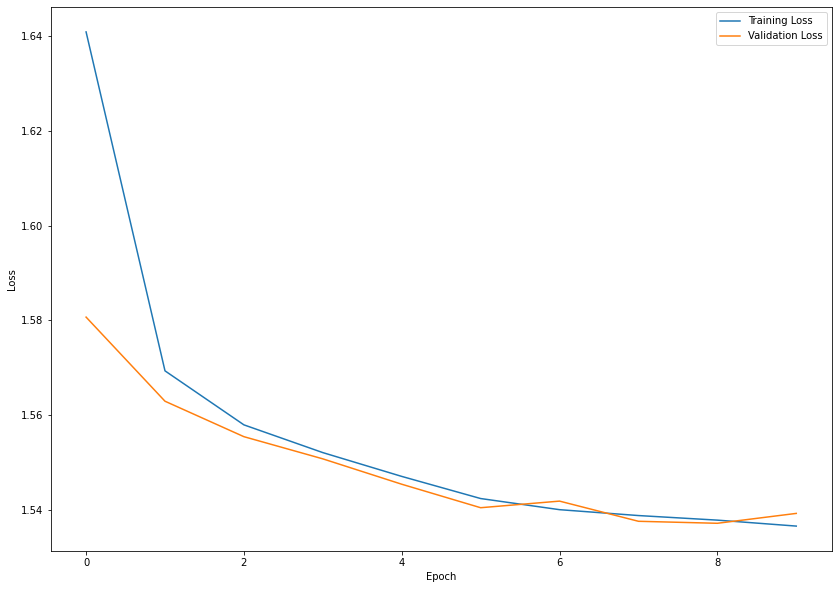

In [109]:
plt.figure(figsize=(14, 10))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')

plt.show()

In [110]:
np.argmin(history.history['val_loss']) + 1

9